# Dihydrofolate reductase (DHFR) ligands for pharmacophore identification

We explore DHFR ligands that will be used to create ligand-based pharmacophore models

In [1]:
from rdkit import Chem
from rdkit.Chem import Draw
import pandas as pd
import openpharmacophore as oph
from pprint import pprint
import nglview as nv

## Load  and visualize ligands

We load the ligands from their respective smiles and draw their molecular structures

In [2]:
lig_df = pd.read_csv("ligands.csv")
lig_df

,Smiles,PDBID,LigID
0,c1ccc(c(c1)C(=O)NCCC[C@@H](C(=O)O)NC(=O)c2ccc(...,1OHK,COP
1,c1cc(ccc1C(=O)N[C@@H](CCC(=O)O)C(=O)O)NCc2cnc3...,1DRF,FOL
2,c1cc(ccc1C(=O)N[C@@H](CCC(=O)O)C(=O)O)NCc2cc3c...,2DHF,DZF
3,C[N@](Cc1coc2c1c(nc(n2)N)N)c3ccc(cc3)C(=O)N[C@...,1HFP,MOT
4,C[N@](Cc1cc(ccc1OC)OC)c2cc3c(nc(nc3nc2)N)N,1BOZ,PRD
5,Cc1c(cnc2c1c(nc(n2)N)N)Cc3cc(ccc3OC)OC,1DLR,MXA


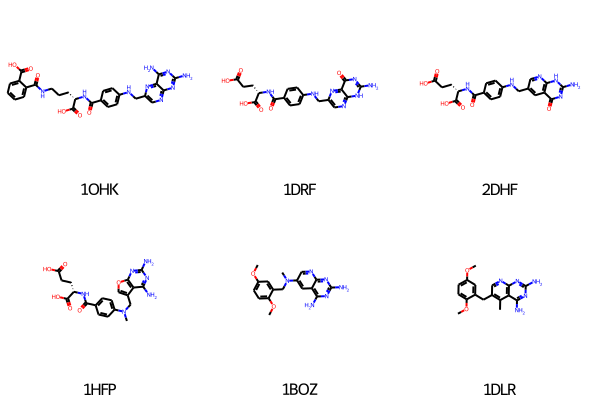

In [3]:
ligands = [Chem.MolFromSmiles(smi) for smi in lig_df["Smiles"]]
legends = [l for l in lig_df["PDBID"]]
Draw.MolsToGridImage(ligands, legends=legends, molsPerRow=3)

## Preparing the ligands

We'll generate different conformers for each of the ligands and add hydrogens to them
as well.

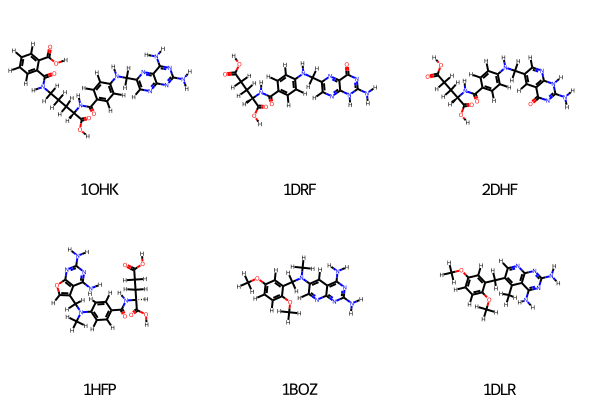

In [4]:
# Add hydrogens and draw them again

pharmacophore = oph.LigandBasedPharmacophore()
pharmacophore.ligands = ligands
pharmacophore.add_hydrogens(ligands="all")

Draw.MolsToGridImage(pharmacophore.ligands, legends=legends)

In [5]:
pharmacophore.generate_conformers(ligands="all", n_confs=10)

## View 3D structures

In [13]:
index = 5
nv.show_rdkit(pharmacophore.ligands[index])

NGLWidget()

## Extracting common pharmacophores

We extract common pharmacophores via recursive distance partitioning algorithm